### TAREA 11

__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [20]:
function met_euler(f,xo,to,tf,h) #Condiciones función
    listx = [xo]
    listt=to:h:tf #Rango para los valores de t
    for i in 1:length(listt)-1 
    xo=xo+h*f((xo),listt[i])  #fórmula del método de Euler
        push!(listx,xo) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

met_euler (generic function with 1 method)

In [21]:

f(x,t)=-2.5x #ecuación diferencial

f (generic function with 1 method)

In [31]:
# se encuentras las listas de x para distintas condiciones de h como se pide en el ejercicio siempre en el mismo intervalo de las t
h0=met_euler(f,1.0,0.0,8.0,1.0); 
h1=met_euler(f,1.0,0.0,8.0,0.5);
h2=met_euler(f,1.0,0.0,8.0,0.2);
h3=met_euler(f,1.0,0.0,8.0,0.01);


Gráfica de la solución exacta.

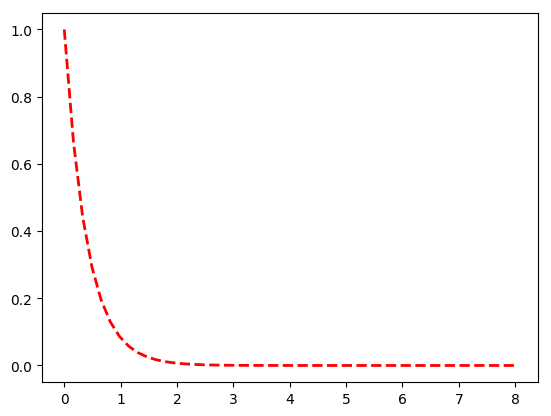

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc4ef268610>

In [49]:
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--")

In [39]:
using PyPlot

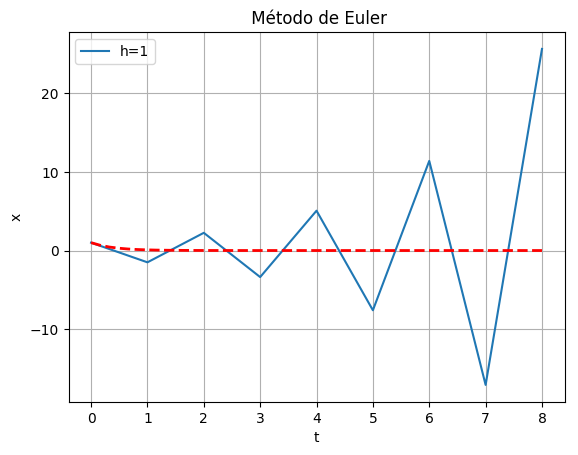

In [79]:

plot(h0,label=("h=1"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--")
    legend()
 xlabel("t")
    ylabel("x")
    title(" Método de Euler")
    grid("on")
show(); 

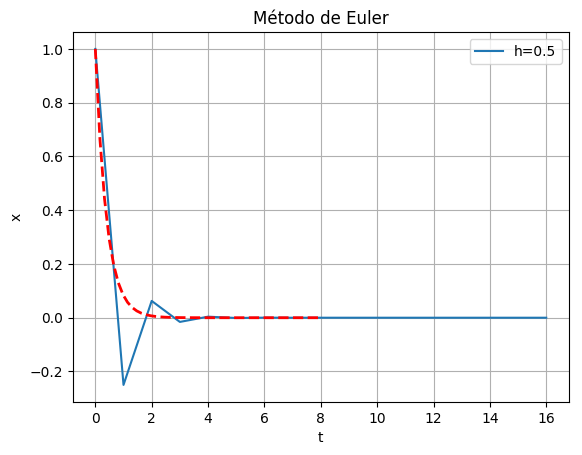

In [61]:

plot(h1,label=("h=0.5"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--")
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Euler")
    grid("on")
show(); 

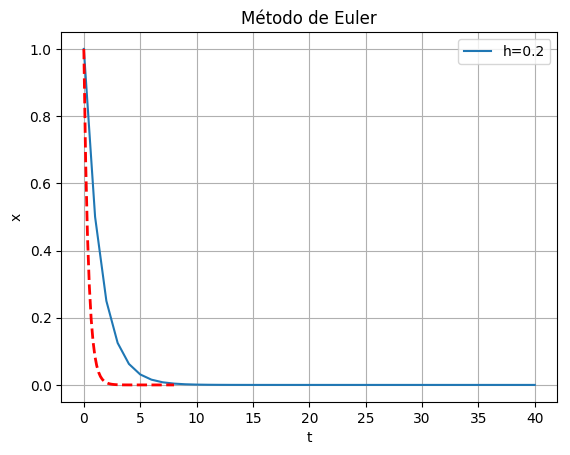

In [52]:
plot(h2,label=("h=0.2"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--")
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Euler")
    grid("on")
show();

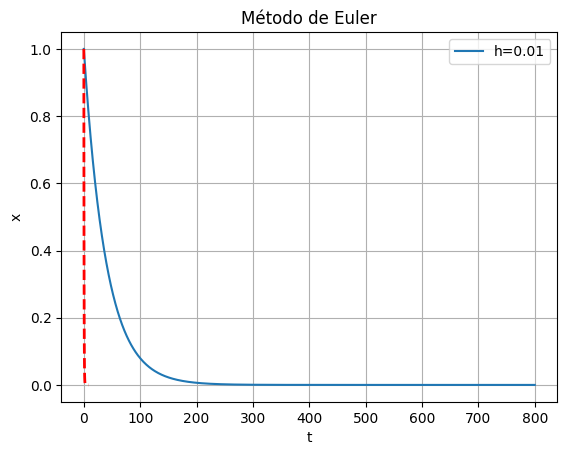

In [62]:
plot(h3,label=("h=0.01"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--")
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Euler")
    grid("on")
show(); 

Vemos que como se va haciendo más pequeño el valor del parámetro h se acerca más a la solución exacta de una exponencial negativa.

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

La ecuación se escribe de la siguiente forma: $\ddot{x}+kx=0$ modela el sistema físico de un oscilador armónico simple y  tiene como solución de forma general: 
$$x(t)=A\cos{(\sqrt{k} t)}+B\sin{(\sqrt{k} t)}$$

Donde A y B son constantes a determinar por medio de las condiciones iniciales. Primero evaluando la solución en $t=0$ obtenemos que $A=x(0)$

Para obtener B derivamos la solucion y se evalua de nuevo en el tiempo cero teniendo: 
$$\dot{x}(0)=\sqrt{k}B$$

Así:
$$B=\frac{\dot{x}(0)}{\sqrt{k}}$$

Por tanto la solución exacta es: 
$$x(t)=x(0)\cos{(\sqrt{k} t)}+\frac{\dot{x}(0)}{\sqrt{k}} \sin{(\sqrt{k} t)}$$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?


derivamos solución del oscilador y se obtiene:
$$u=\dot{x}(t)=-x(0)\sqrt{k}\sin{(\sqrt{k} t)}+\dot{x}(0) \cos{(\sqrt{k} t)}$$

derivamos u
$$ \dot{u}=-x(0)k\cos{(\sqrt{k} t)}-\dot{x}(0)\sqrt{k} \sin{(\sqrt{k} t)}$$

$$ \dot{u}=-k(x(0)\cos{(\sqrt{k} t)}+\frac{\dot{x}(0)}{\sqrt{k}} \sin{(\sqrt{k} t)})$$

 por tanto vemos que la derivada de u se relaciona con el sistema original como 
$$\dot{u}=-kx$$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

In [64]:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [65]:
f(x,t)=[x[2], -1.0*x[1]] #crea la ecuación diferencial de dos dimensiones. 

f (generic function with 1 method)

In [66]:
list=0:0.01:10;
vector=euler(f,list,[0,1]);

In [67]:
listx1=map(x->x[1],vector);
listx2=map(x->x[2],vector);

In [7]:

using PyPlot

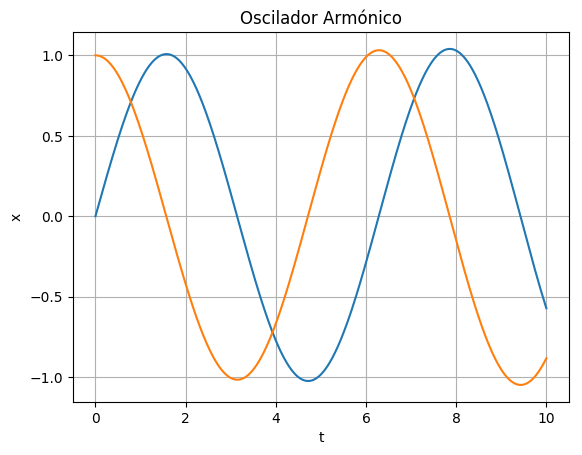

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [68]:
plot(list,listx1)
plot(list,listx2)
legend()
 xlabel("t")
    ylabel("x")
    title("Oscilador Armónico")
    grid("on")
show(); 

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [80]:
f(x,t)=(2x-18t)/(t+1) #ecuación diferencial

f (generic function with 1 method)

In [81]:
hm=met_euler(f,0.0,0.0,10.0,0.01); #aplicar el programa escrito en el ejercicio 1 para la ecuación diferencial.

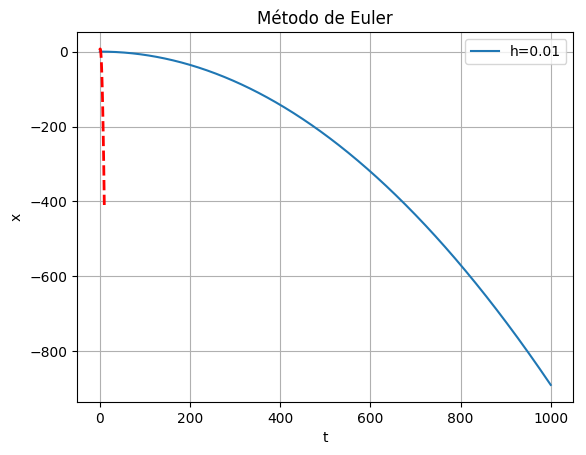

In [102]:
plot(hm,label=("h=0.01"))
t = linspace(0.0,10); x =4+8t-5t.^2
plot(t, x, color="red", linewidth=2.0, linestyle="--")
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Euler")
    grid("on")
show();

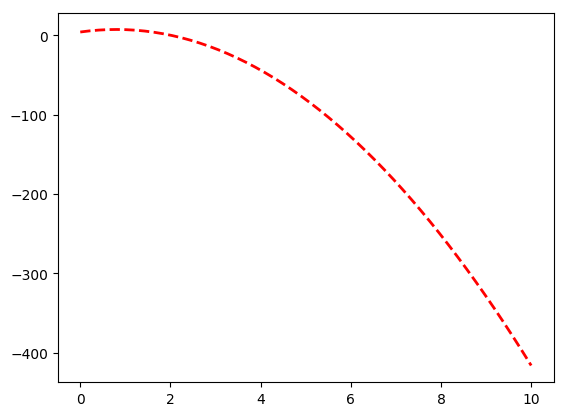

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc4ee4a6250>

In [99]:
t = linspace(0.0,10.0); x =4+8t-5t.^2
plot(t, x, color="red", linewidth=2.0, linestyle="--")